In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y = torch.load('C:\\files\\MNIST\\training.pt')

class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

train_ds = CTDataset('C:\\files\\MNIST\\training.pt')
test_ds = CTDataset('C:\\files\\MNIST\\test.pt')

In [3]:
train_ds.x.shape

torch.Size([60000, 28, 28])

In [4]:
train_ds.x[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

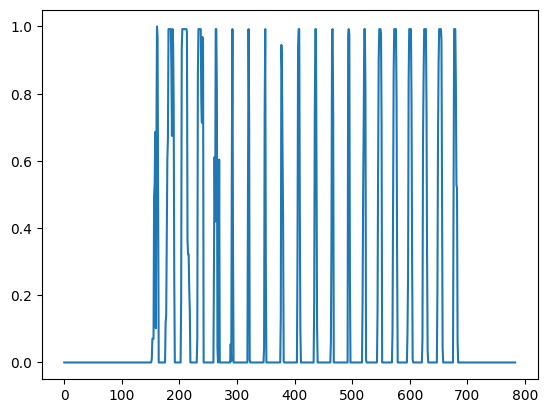

In [5]:
plt.plot(train_ds.x[0].reshape(-1))

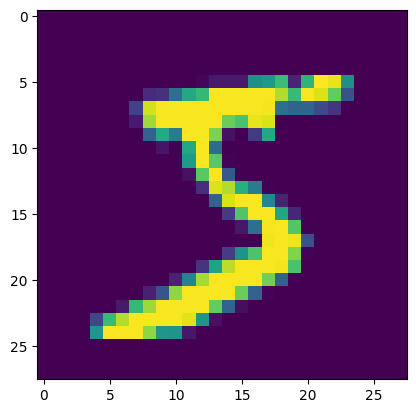

In [6]:
plt.imshow(train_ds.x[0])

In [7]:
train_dl = DataLoader(train_ds, batch_size=64)

In [8]:
class MNISTNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.L1 = nn.Linear(28*28, 100)
        self.L2 = nn.Linear(100, 50)
        self.L3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
        self.L = nn.CrossEntropyLoss()
        self.opt = Adam(self.parameters(), lr = 0.01)
        
    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.R(self.L1(x)) 
        x = self.R(self.L2(x))
        x = self.L3(x)
        return F.softmax(x.squeeze(), dim = -1)
    
    def loss_fn(self,x,y_true):
        y_pred = self(x)
        loss = self.L(y_pred,y_true)
        return loss
    
    def train_step(self, x, y):
        self.opt.zero_grad()
        loss = self.loss_fn(x, y)
        loss.backward()
        self.opt.step()
        return loss.item()

In [9]:
#for params in f.parameters():
 #   print(params.shape)

In [10]:
def train(dl, f, lr = 0.01, n_epochs = 20):
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f"Epoch {epoch}")
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            epochs.append(epoch + i/N)
            losses.append(f.train_step(x, y))
    return np.array(epochs), np.array(losses)

In [11]:
f = MNISTNN()
n_epochs = 20
lr = 0.001
epochs, losses = train(train_dl, f, lr, n_epochs)

Epoch 0


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy per batch')

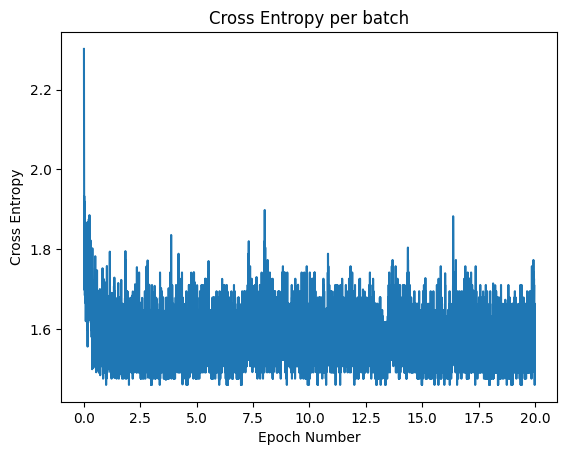

In [12]:
plt.plot(epochs, losses)
plt.xlabel("Epoch Number")
plt.ylabel("Cross Entropy")
plt.title("Cross Entropy per batch")

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

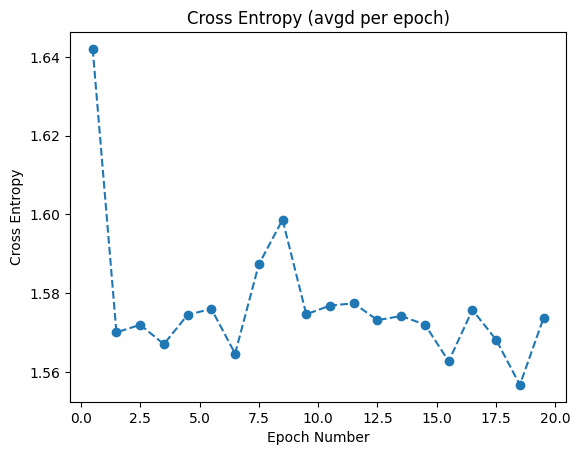

In [13]:
epochs_avg = epochs.reshape(n_epochs,-1).mean(axis=1)
losses_avg = losses.reshape(n_epochs,-1).mean(axis=1)

plt.plot(epochs_avg, losses_avg, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

Accuracy = 0.8385


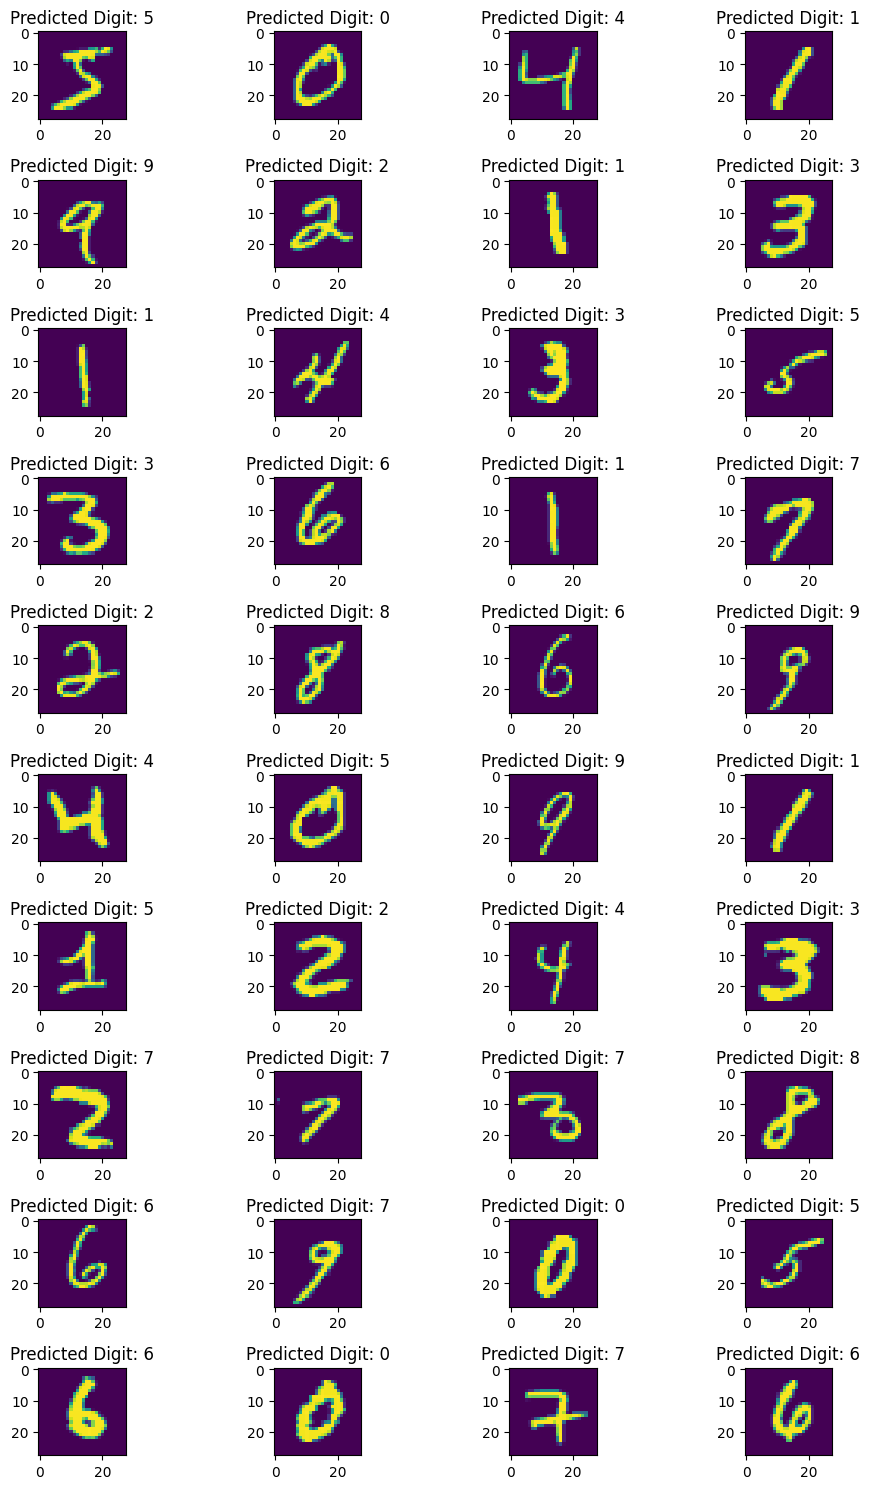

In [14]:
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)

accuracy_count = 0
for i in range(2000):
    if yhats[i] == ys.argmax(axis=1)[i]:
        accuracy_count += 1
accuracy = accuracy_count/2000
print(f"Accuracy = {accuracy}")

fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()